# Word Clouds

We need to install a few libraries which are needed for NLP

In [9]:
!pip install unidecode simplejson nltk wordcloud

We will use a lot of libraries

In [1]:
import re
from nltk.corpus import stopwords
from unidecode import unidecode
from nltk.stem.snowball import ItalianStemmer
from collections import Counter
from wordcloud import WordCloud
import nltk
from IPython.display import Image 
import matplotlib.pyplot as plt

%matplotlib inline

nltk.download("stopwords") # nltk needs us to manually download the set of stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RConti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Then we will open a file containing our texts. The text is in italian, and as such it has special characters like è and é. This requires us to open it specifying the format (UTF-8). 
We take all the words and let the re library (regular expression) handle this splitting.

In [3]:
def get_file_tokens(filename):
    tokens = []
    with open(filename, encoding="utf-8") as f: # here is the line where we open the file
        for line in f:
            tokens += re.split('\W+', line,  flags=re.UNICODE) # re library deals with the splitting
    return tokens

In [12]:
def get_file_tokens(filename):
    tokens = []
    for line in filename:
        tokens += re.split('\W+', line,  flags=re.UNICODE) # re library deals with the splitting
    return tokens

In [5]:
import os
import pandas as pd

def leggi_file_csv_in_sottocartelle(directory):
    # Lista dei DataFrame letti dai file CSV
    elenco_dataframe = []

    # Naviga attraverso tutte le sottocartelle e file nella directory data
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                # Costruisci il percorso completo del file
                file_path = os.path.join(root, file)
                # Leggi il file CSV e aggiungi il DataFrame alla lista
                df = pd.read_csv(file_path)
                elenco_dataframe.append(df)

    # Concatena tutti i DataFrame in un unico DataFrame
    dataframe_completo = pd.concat(elenco_dataframe, ignore_index=True)
    
    return dataframe_completo

# Specifica la directory radice in cui cercare i file CSV
directory_radice = 'C:/Users/RConti/PycharmProjects/pythonProject/PROGETTONE/CityNews_SCraper'

# Chiama la funzione per leggere e concatenare i file CSV nelle sottocartelle
tutti_i_dati = leggi_file_csv_in_sottocartelle(directory_radice)

# Ora `tutti_i_dati` contiene un unico DataFrame che combina tutti i dati dai file CSV trovati
# Puoi lavorare con questo DataFrame come desideri
print(tutti_i_dati.head())  # Stampa le prime righe del DataFrame combinato

      Autore                   Data          Edizione  \
0  Redazione  22 gennaio 2024 11:20  agrigentonotizie   
1  Redazione    19 marzo 2024 12:10  agrigentonotizie   
2  Redazione  26 gennaio 2024 17:10  agrigentonotizie   
3      C. R.  31 gennaio 2024 09:37  agrigentonotizie   
4  Redazione  21 gennaio 2024 08:39  agrigentonotizie   

                                              Titolo  \
0  Agricoltori e allevatori in crisi: trattori in...   
1  Agricoltori, allevatori e pescatori in marcia ...   
2  Alga rossa al lago Arancio e agricoltori in gi...   
3  Allevatori e agricoltori in corteo lungo le st...   
4  Contro l'Ue, il Governo e la Regione: la prote...   

                                         Sottotitolo  \
0  Il corteo si è concentrato questa mattina a Sc...   
1  Anche dall'Agrigentino partirà una delegazione...   
2  Ipotizzato l'uso delle acque per le colture or...   
3  Filippo Romano, dopo l'incontro con una delega...   
4  Una ventina i trattori che domani sfi

In [11]:
Testo = tutti_i_dati['Testo'].to_list()

In [13]:
tokens = get_file_tokens(Testo) # the file we open contains the Qaran
# tokens = get_file_tokens("C:/Users/RConti/PycharmProjects/pythonProject/divinaCommedia.txt") # the file we open contains the Qaran
print(tokens[:100])
len(tokens)

['', 'Agricoltori', 'e', 'allevatori', 'in', 'ginocchio', 'protesta', 'a', 'Sciacca', 'questa', 'mattina', 'A', 'organizzarla', 'sono', 'stati', 'i', 'Movimenti', 'Agricoli', 'Italiani', 'Federati', 'alcuni', 'comitati', 'spontanei', 'l', 'associazione', 'Terra', 'è', 'Vita', 'e', 'il', 'Circolo', 'Unione', 'Rinascente', 'L', 'iniziativa', 'nasce', 'dalla', 'necessità', 'di', 'segnalare', 'alle', 'autorità', 'lo', 'stato', 'di', 'grave', 'sofferenza', 'del', 'comparto', 'sottoposto', 'alla', 'pressione', 'dei', 'costi', 'elevati', 'di', 'gestione', 'e', 'produzione', 'di', 'Irpef', 'e', 'legge', 'di', 'bilancio', '2024', 'ma', 'anche', 'alla', 'gravissime', 'vicenda', 'dell', 'impossibilità', 'di', 'approvigionarsi', 'dell', 'acqua', 'del', 'lago', 'Arancio', 'attualmente', 'inquinata', 'dalla', 'presenza', 'dell', 'alga', 'rossa', 'Un', 'corteo', 'di', 'trattori', 'si', 'è', 'concentrato', 'questa', 'mattina', 'a', 'Sciacca', 'e', 'si']


147570

Now we need to do some statistical analysis on the newly loaded set of words. For that we use the Counter object of the standard collections of Python

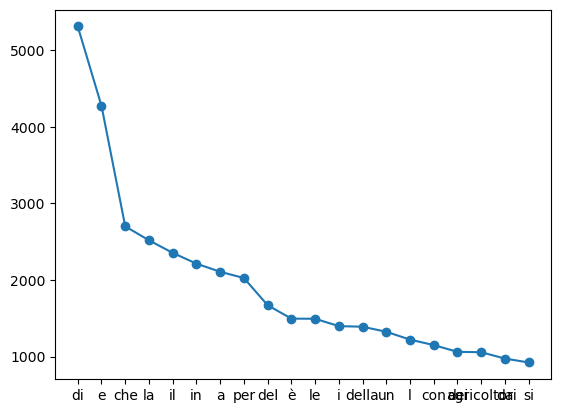

In [14]:
c = Counter(tokens)
c["Allah"] # print the number of times that the token "Abramo" appears
c.most_common(10)

import matplotlib.pyplot as plt
y = [count for tag, count in c.most_common(20)]
x = [tag for tag, count in c.most_common(20)]

plt.plot(x, y, marker='o')

In [56]:
import pandas as pd
print(type(c))
c = Counter(["stringa", "a" ,"piacere"])
c["e"]

<class 'collections.Counter'>


0

In [15]:
len(c) # number of unique tokens

15407

In [16]:
sum(c.values()) # total number of tokens in the document

147570

Now let's see the code to generate the word cloud. We use the matplotlib library only to display it inline on this notebook

In [17]:
def generate_tag_cloud(freq, image_filename=None):
	wc = WordCloud(background_color="white").generate_from_frequencies(freq)
	if image_filename:
        # If you pass it a filename, then it saves the image on the provided path
		image = wc.to_image()
		image.save(image_filename)
	else:
        # then it just displays it here on the notebook
		plt.imshow(wc, interpolation='bilinear')
		plt.axis("off")
		plt.show()

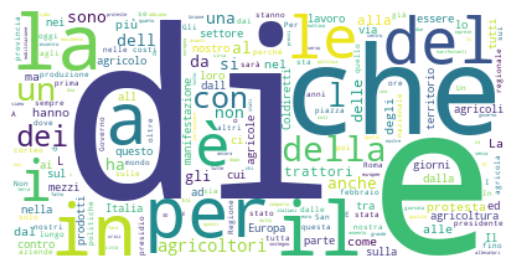

In [18]:
generate_tag_cloud(c)

Nice! We got our first word cloud.
We immediately notice something odd. 
- Why do we see "e", "è" and "E" as separate tokens?
- Why do we see them as tokens in the first place? 

Let's filter out all the words that are shorter than 3, and re-generate the word clouds

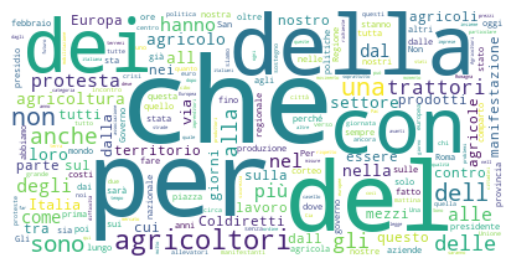

In [46]:
def filter_words(words):
    return [w for w in words if len(w) >= 3]

c = Counter(filter_words(tokens))
generate_tag_cloud(c)

Ok, slightly better, but we can do much better. "che" means "than" in italian, which is surely something that we don't care to see in a word-cloud. Let's filter out all the stopwords.

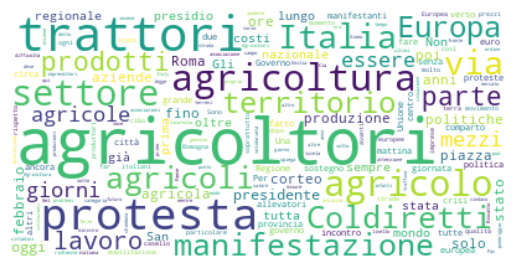

In [47]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('italian'))

def filter_words(words):
    return [w for w in words if len(w)>=3 and w not in STOPWORDS]

c = Counter(filter_words(tokens))
generate_tag_cloud(c)

Even better. But there's some sneaky issues. Say I have a not well formed text, where I have the italian word for "why", written as "perche", "perchè",  "perché", "Perchè", "Perche", "Perché". Those would fall into 6 different tokens in the word cloud. I want them to fall into their "common form".
For this purpose, we perform **normalization** and we also **lowercase** our text.

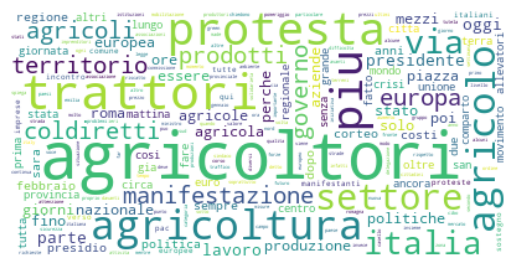

In [48]:
def normalize_words(words):
    return [unidecode(w.lower()) for w in words]

filtered_t = filter_words(normalize_words(tokens))
c = Counter(filtered_t)
generate_tag_cloud(c)

Ok but what about this problem. 
"quello", "quella", "quegli", "quelle" are all words that effectively belong to the same semantic group. The only difference is on the "gendered-annotation" and in the singular-plural forms. I want to also group those. 
Luckily, there is **stemming** which solves this problem. As you can imagine, stemming algorithms are language based, so we have to specify manually our language.

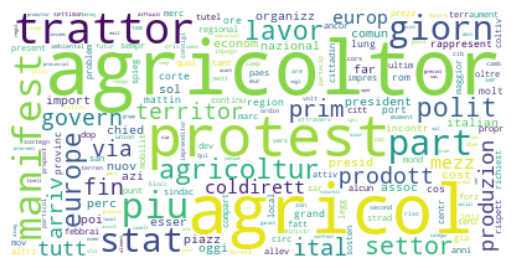

In [50]:
def stem_words(words):
	s = ItalianStemmer()
	return [s.stem(w) for w in words]

c = Counter(stem_words(filtered_t))
generate_tag_cloud(c)

Oh no, we ruined our word cloud. We don't want the "roots" of our words showing here, but how do we solve it?

Well we might substitute the roots with the most common words referring to those roots. We need to create a mapping containing:
```json
{
    "root word": <Counter containing the words and their occcurrence number>
}
```

In [51]:
def get_stem_mapping(words):
	s = ItalianStemmer() 
	mapping = {} # here is our mapping
	for w in words: 
		stemmed_w = s.stem(w)
		if stemmed_w not in mapping: 
			mapping[stemmed_w] = Counter()
		mapping[stemmed_w].update([w])

	return mapping

Then we must create a new function which, given that mapping, is able to de-stem the words. 

In [52]:
def destem_words(stems, stem_mapping):
	return [stem_mapping[s].most_common(1)[0][0] for s in stems] # ask the counter to get the most common occurrence for each root word

The full pipeline becomes the following:
1. stem all the filtered tokens (we already did normalization, tokenization...)
2. compute the mapping of the stems
3. de-stem the words. 
4. Do the word cloud

In [25]:
stemmed = stem_words(filtered_t)
stem_mapping = get_stem_mapping(filtered_t)
destemmed = destem_words(stemmed, stem_mapping)
c = Counter(destemmed)
#stem_mapping

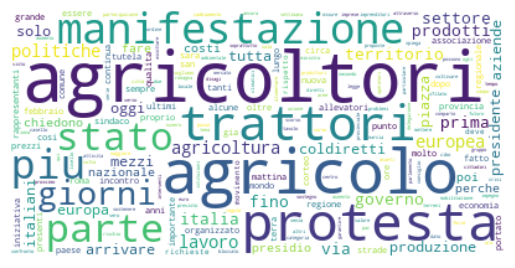

In [26]:
generate_tag_cloud(c)

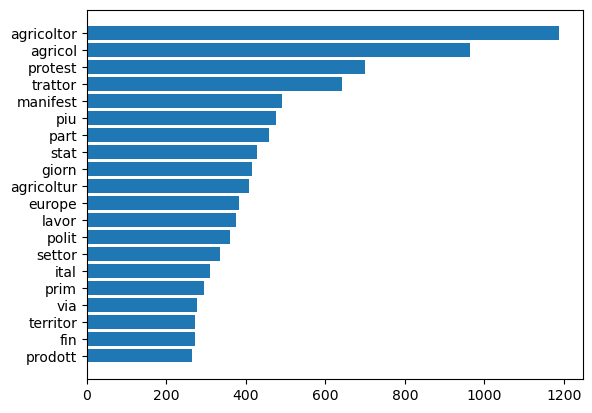

In [61]:
import matplotlib.pyplot as plt
y = [count for tag, count in c.most_common(20)]
x = [tag for tag, count in c.most_common(20)]

plt.barh(x, y)
plt.gca().invert_yaxis()  # Inverte l'asse y per avere le categorie in ordine corretto
#plt.xticks(rotation=90)
plt.show()

In [97]:
import altair as alt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import HBox, VBox, Layout
import warnings
warnings.filterwarnings("ignore")

# Sample DataFrame with longer category names
df = tutti_i_dati

# Dropdown options (list of Territorio)
dropdown_options = sorted(df['Edizione'].unique().tolist())

# Function to update chart1 based on selected category
def update_chart1(Edizione):
    filtered_df = df[df['Edizione'] == Edizione]

    Testo = filtered_df['Testo'].to_list()
    tokens = get_file_tokens(Testo)
    filtered_t = filter_words(normalize_words(tokens))
    stemmed = stem_words(filtered_t)
    stem_mapping = get_stem_mapping(filtered_t)
    destemmed = destem_words(stemmed, stem_mapping)
    c = Counter(destemmed)

    generate_tag_cloud(c)

    '''y = [count for tag, count in c.most_common(20)]
    x = [tag for tag, count in c.most_common(20)]
    
    plt.barh(x, y)
    plt.gca().invert_yaxis()
    plt.show()'''

    c_df = pd.DataFrame(list(c.items()), columns=['Word', 'Count'])

    # Sort the DataFrame by the 'Count' column in descending order
    df_sorted = c_df.sort_values(by='Count', ascending=False)

    # Select the top 20 rows
    top_20 = df_sorted.head(20)

    chart = alt.Chart(top_20).mark_bar().encode(
        x = 'Count:Q',
        y = alt.Y('Word:N', title='Word', sort='-x'),
        size=alt.Size(field='Count', type='quantitative', bin=alt.BinParams(maxbins=5)),
        color=alt.Color('Count:Q', scale=alt.Scale(scheme='blues')),
        tooltip=['Word', 'Count']
    )
    
    display(chart)

    '''nltk_text = nltk.Text(tokens)
    nltk_text.dispersion_plot(top_20['Word'].to_list())'''

dropdown_edizione = widgets.Dropdown(
    options=dropdown_options,
    value=dropdown_options[0],  # Set initial value
    description='Select Edizione:',
    style={'description_width': 'initial'}  # Set description width to full
)  

# Initial display of charts and dropdowns side by side
output1 = widgets.Output()

with output1:
    display(VBox([dropdown_edizione]))
    update_chart1(dropdown_edizione.value)

# Arrange the outputs (charts) horizontally using HBox layout
display(output1)

# Set up event handlers for dropdowns
def on_edizione_change(change):
    with output1:
        clear_output(wait=True)
        display(VBox([dropdown_edizione]))
        update_chart1(change.new)

dropdown_edizione.observe(on_edizione_change, names='value')

Output()